In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import h5py 

In [2]:
f = h5py.File('../data/asymptotics/asymptotic_integral/metadata.h5','r')
t0 = np.array(f['t0'])[0]
tf = np.array(f['tf'])[0]
h = np.array(f['h'])[0]
Tx = np.array(f['Tx'])[0]
print(f.keys())
f.close()

<KeysViewHDF5 ['Tx', 'h', 't0', 'tf']>


In [3]:
k_range = np.arange(2,5)
n_range = np.arange(2,5)
Ts_range = np.arange(.025,0.21,.025)

trange = np.logspace(np.log10(t0),np.log10(tf),30)
integrals = np.zeros((len(k_range),len(n_range),len(Ts_range),30))
idx=0
for kk,k in enumerate(k_range):
    for kn,n in enumerate(n_range):
        for kTs,Ts in enumerate(Ts_range):
            f = h5py.File('../data/asymptotics/asymptotic_integral/integral_{}.h5'.format(idx),'r')
            integrals[kk,kn,kTs] = np.array(f['integral'])
            f.close()
            idx+=1
        print(k,n)

2 2
2 3
2 4
3 2
3 3
3 4
4 2
4 3
4 4


In [4]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [5]:
from sklearn.linear_model import LinearRegression

0.9999318367975006
[1.02382826] -0.8535442273542557
0.9996955257793874
[1.0456616] -0.9405115278039791
0.9999354924092752
[0.98792797] -1.076947398553516


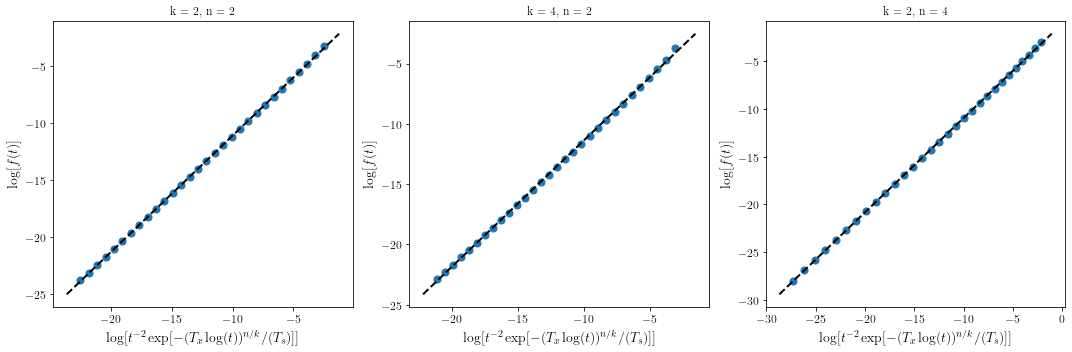

In [6]:
kk=0
kn=0
k = k_range[kk]
n = n_range[kn]
kTs=7
Ts= Ts_range[kTs]

X = np.log10(trange**(-2)*np.exp(-(Tx*np.log(trange))**(n/k)/(Ts)))
y = np.log10(integrals[kk,kn,kTs])

reg = LinearRegression().fit(X.reshape(-1,1), y)
R2_without = reg.score(X.reshape(-1,1), y)

print(R2_without)
m=reg.coef_[0]
b = reg.intercept_
print(reg.coef_,reg.intercept_)


plt.figure(figsize=(15.,5))
plt.subplot(1,3,1)
plt.title('k = {}, n = {}'.format(k,n))
xrange = np.linspace(X.min()*1.05,X.max()*.5,10)
plt.plot(xrange,m*xrange+b,c='k',ls='--',lw=2)
plt.scatter(X,y,s=50)
# plt.axis('equal')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\log[t^{-2} \exp[-(T_{x} \log(t))^{n/k}/(T_s)]]$',fontsize=14)
plt.ylabel(r'$\log[f(t)]$',fontsize=14)
# plt.tight_layout()

kk=2
kn=0
k = k_range[kk]
n = n_range[kn]

X = np.log10(trange**(-2)*np.exp(-(Tx*np.log(trange))**(n/k)/(Ts)))
y = np.log10(integrals[kk,kn,kTs])


reg = LinearRegression().fit(X.reshape(-1,1), y)
R2_without = reg.score(X.reshape(-1,1), y)

print(R2_without)
m=reg.coef_[0]
b = reg.intercept_
print(reg.coef_,reg.intercept_)


plt.subplot(1,3,2)
plt.title('k = {}, n = {}'.format(k,n))
xrange = np.linspace(X.min()*1.05,X.max()*.5,10)
plt.plot(xrange,m*xrange+b,c='k',ls='--',lw=2)
plt.scatter(X,y,s=50)
# plt.axis('equal')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\log[t^{-2} \exp[-(T_{x} \log(t))^{n/k}/(T_s)]]$',fontsize=14)
plt.ylabel(r'$\log[f(t)]$',fontsize=14)
# plt.tight_layout()


kk=0
kn=2
k = k_range[kk]
n = n_range[kn]
X = np.log10(trange**(-2)*np.exp(-(Tx*np.log(trange))**(n/k)/(Ts)))
y = np.log10(integrals[kk,kn,kTs])


reg = LinearRegression().fit(X.reshape(-1,1), y)
R2_without = reg.score(X.reshape(-1,1), y)

print(R2_without)
m=reg.coef_[0]
b = reg.intercept_
print(reg.coef_,reg.intercept_)


plt.subplot(1,3,3)
plt.title('k = {}, n = {}'.format(k,n))
xrange = np.linspace(X.min()*1.05,X.max()*.5,10)
plt.plot(xrange,m*xrange+b,c='k',ls='--',lw=2)
plt.scatter(X,y,s=50)
# plt.axis('equal')
# plt.xlim(X.min(),X.max())
# plt.ylim(Y.)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\log[t^{-2} \exp[-(T_{x} \log(t))^{n/k}/(T_s)]]$',fontsize=14)
plt.ylabel(r'$\log[f(t)]$',fontsize=14)
plt.tight_layout()
# plt.savefig('asymptotic_log.pdf')
plt.show()